## Проект по машинному обучению 

Выборка 'car.data', описывает зависимости между некоторыми параметрами автомобиля и его состоянием

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
data = pd.read_csv(path, header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug boot', 'Safety', 'Target']

In [5]:
data.head()

,Buying,Maint,Doors,Persons,Lug boot,Safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
for k in data.columns:
    for n, f in enumerate(data[k].unique()):
        temp = data[k]
        temp[data[k] == f] = n

In [42]:
data.tail()

,Buying,Maint,Doors,Persons,Lug boot,Safety,Target
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3
1727,3,3,3,2,2,2,2


In [19]:
X = data[data.columns[:-1]]
y = list(data[data.columns[-1]])

In [44]:
import sklearn.metrics as m
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split as split

In [21]:
X_train, X_test, y_train, y_test = split(X, y, train_size = 0.7)

In [23]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
ans = svc.predict(X_test)
m.accuracy_score(y_test, ans)

0.96146435452793833

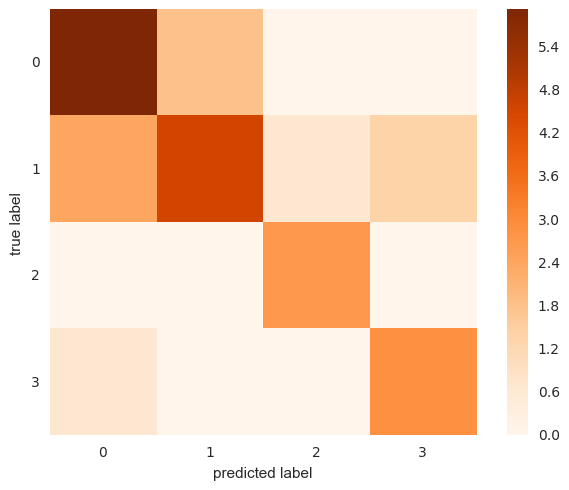

In [48]:
M1 = m.confusion_matrix(ans, y_test)
plt.imshow(np.log(M+1), interpolation = 'nearest',cmap='Oranges') # log scale для контраста
plt.grid(False)
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [49]:
import seaborn as sea

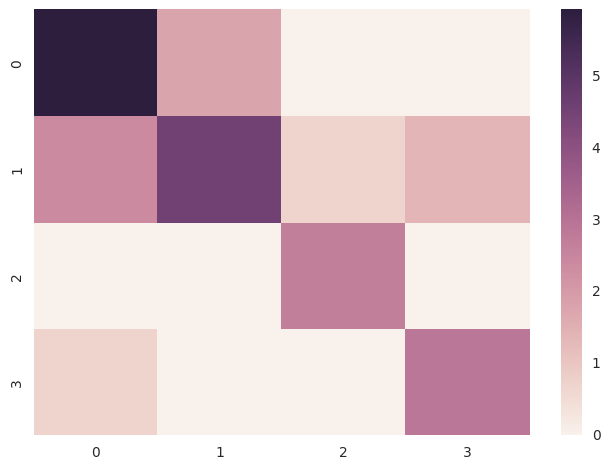

In [50]:
sea.heatmap(np.log(M1+1))

In [127]:
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
m.accuracy_score(LR.predict(X_test), y_test)
ans2 = LR.predict(X_test)
M2 = np.log(m.confusion_matrix(LR.predict(X_test), y_test)+1)

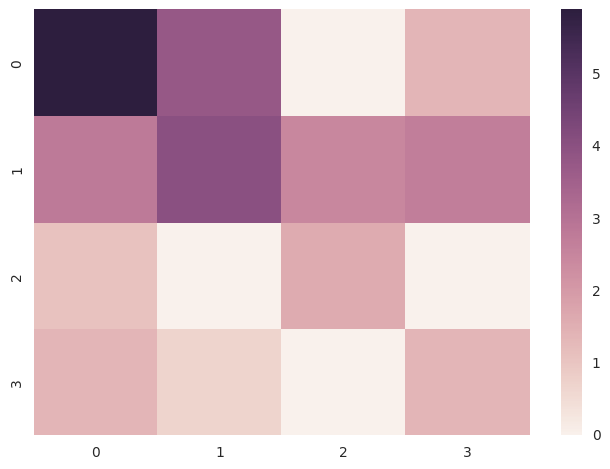

In [135]:
sea.heatmap(M2)

In [60]:
from sklearn import preprocessing as pre

In [62]:
Xn_tr = pre.scale(X_train)
Xn_ts = pre.scale(X_test)

In [68]:
svm2 = SVC()

In [70]:
svm2.fit(Xn_tr, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
m.accuracy_score(svm2.predict(Xn_ts), y_test)

0.95375722543352603

In [82]:
from sklearn.ensemble import RandomForestClassifier as forest
fr = forest()

In [83]:
fr.fit(X_train, y_train)
ans3 = fr.predict(X_test)
m.accuracy_score(ans3, y_test)

0.95568400770712914

In [87]:
M3 = np.log(m.confusion_matrix(ans3, y_test)+1)

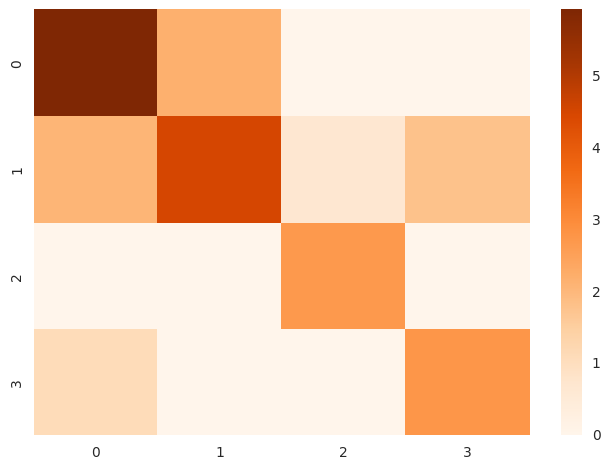

In [93]:
sea.heatmap(M3, cmap = 'Oranges')

In [96]:
from sklearn.grid_search import GridSearchCV

In [113]:
ne = np.arange(4, 51, 5)
gr = GridSearchCV(fr, param_grid = {'n_estimators' : ne})

In [114]:
gr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 49])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [118]:
gr.best_estimator_.n_estimators

24

In [119]:
ans4 = gr.predict(X_test)
m.accuracy_score(ans4, y_test)

0.98265895953757221

In [120]:
M4 = np.log(m.confusion_matrix(ans4, y_test)+1)

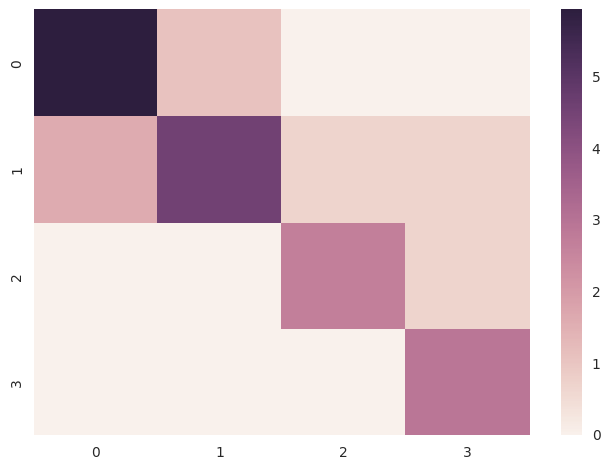

In [121]:
sea.heatmap(M4)